In [15]:
import pandas as pd
import os

In [45]:
df = pd.read_csv('housepricedata.csv')

In [46]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [47]:
dataset = df.values

In [48]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [49]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [52]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [53]:
from sklearn.model_selection import train_test_split
#splits data into train and (val and test) then splits val and tests apart
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [54]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [60]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 68ms/step - loss: 0.6878 - accuracy: 0.4990 - val_loss: 0.6852 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6823 - accuracy: 0.5087 - val_loss: 0.6812 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6795 - accuracy: 0.4942 - val_loss: 0.6773 - val_accuracy: 0.5023
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6709 - accuracy: 0.5295 - val_loss: 0.6733 - val_accuracy: 0.5068
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6675 - accuracy: 0.5361 - val_loss: 0.6693 - val_accuracy: 0.5114
Epoch 6/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6613 - accuracy: 0.5362 - val_loss: 0.6653 - val_accuracy: 0.5251
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6603 - accuracy: 0.5414 - val_loss: 0.6613 - val_accuracy: 0.5479
Epoch 8/10

In [62]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 6ms/step - loss: 0.3248 - accuracy: 0.8676


0.8675799369812012

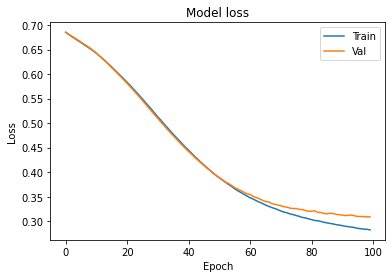

In [64]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

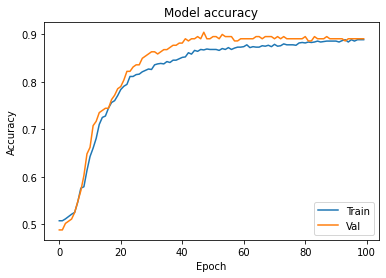

In [66]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [67]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [68]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 7s 145ms/step - loss: 0.5199 - accuracy: 0.7428 - val_loss: 0.3467 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 3s 107ms/step - loss: 0.3241 - accuracy: 0.8652 - val_loss: 0.3530 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 5s 158ms/step - loss: 0.3079 - accuracy: 0.8824 - val_loss: 0.2973 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 4s 138ms/step - loss: 0.2638 - accuracy: 0.8894 - val_loss: 0.3153 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 5s 171ms/step - loss: 0.2951 - accuracy: 0.8590 - val_loss: 0.3230 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 4s 125ms/step - loss: 0.2621 - accuracy: 0.8793 - val_loss: 0.3192 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 4s 113ms/step - loss: 0.2185 - accuracy: 0.9107 - val_loss: 0.3529 - val_accuracy: 0.8630

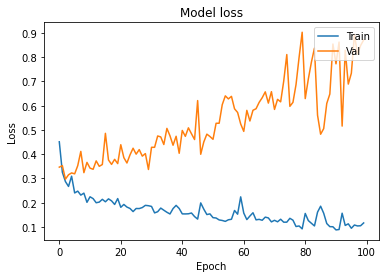

In [70]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

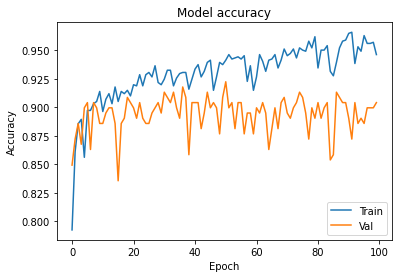

In [72]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [74]:
from keras.layers import Dropout
from keras import regularizers

In [75]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [76]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 6s 110ms/step - loss: 21.1071 - accuracy: 0.5632 - val_loss: 3.9260 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 3s 96ms/step - loss: 2.4828 - accuracy: 0.7659 - val_loss: 0.6614 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 3s 81ms/step - loss: 0.5830 - accuracy: 0.8666 - val_loss: 0.5591 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 5s 157ms/step - loss: 0.5506 - accuracy: 0.8490 - val_loss: 0.5491 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 4s 124ms/step - loss: 0.5166 - accuracy: 0.8541 - val_loss: 0.4612 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 6s 180ms/step - loss: 0.4757 - accuracy: 0.8937 - val_loss: 0.4593 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 4s 122ms/step - loss: 0.4787 - accuracy: 0.8643 - val_loss: 0.4653 - val_accuracy: 0.8950


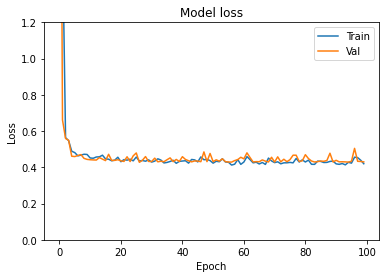

In [78]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

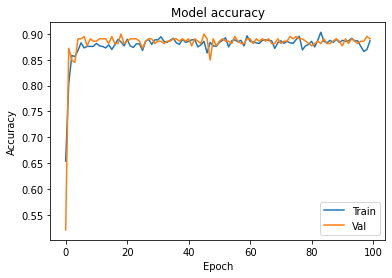

In [79]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()